## Visualizing Filters of a Convolutional Neural Network

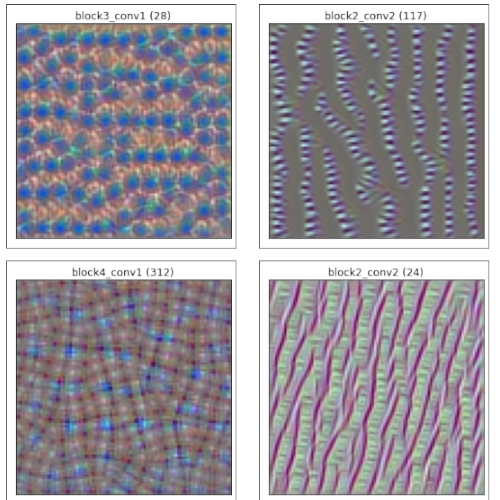

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights="imagenet",
    input_shape=(96, 96, 3))
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

## Task 3: Get Layer Output

In [4]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output)

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 4: Image Visualization

In [6]:
def create_image():
  return tf.random. uniform((96, 96, 3), minval=-0.5, maxval=0.5)
def plot_image(image, title= 'random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(random)
  plt.show()

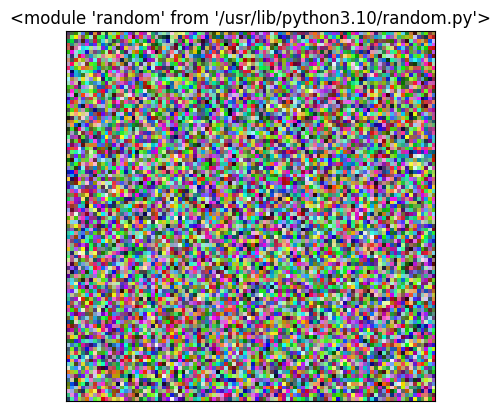

In [7]:
image=create_image()
plot_image(image)

## Task 5: Training Loop

In [15]:
import random
import tensorflow as tf

def visualize_filter(layer_name, f_index=None, iters=50):
    submodel = get_submodel(layer_name)
    num_filters = submodel.output.shape[-1]

    if f_index is None:
        f_index = random.randint(0, num_filters - 1)
    assert num_filters > f_index, 'f index is out of bounds'
    image = create_image()
    verbose_step = int(iters / 10)

    for i in range(0, iters):
        with tf.GradientTape() as tape:
            tape.watch(image)
            out = submodel(tf.expand_dims(image, axis=0))[:, :, :, f_index]
            loss = tf.math.reduce_mean(out)

        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += grads * 10

        if (i + 1) % verbose_step == 0:
            print(f'Iteration: {i + 1}, Loss: {loss.numpy(): .4f}')

    plot_image(image, f'{layer_name},{f_index}')

## Task 6: Final Results

In [16]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss:  3.7248
Iteration: 20, Loss:  7.0888
Iteration: 30, Loss:  10.4528
Iteration: 40, Loss:  13.8168
Iteration: 50, Loss:  17.1808
Iteration: 60, Loss:  20.5448
Iteration: 70, Loss:  23.9088
Iteration: 80, Loss:  27.2728
Iteration: 90, Loss:  30.6368
Iteration: 100, Loss:  34.0008


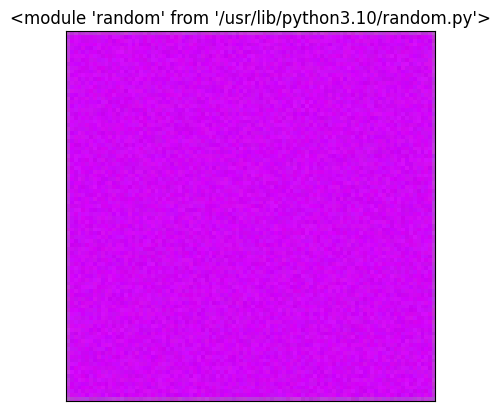

In [19]:
layer_name = 'block1_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
visualize_filter(layer_name, iters=100)